In [1]:
!pip install findspark
!pip install xlrd
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 KB 1.5 MB/s eta 0:00:00-:--:--
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 5.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 6.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 5.4 MB/s eta 0:00:0000:0100:01


In [2]:
import findspark
findspark.init()
import pyspark
import random


sc = pyspark.SparkContext(appName="Pi")
num_samples = 100000000
def inside(p):     
  x, y = random.random(), random.random()
  return x*x + y*y < 1
count = sc.parallelize(range(0, num_samples)).filter(inside).count()
pi = 4 * count / num_samples
print(pi)
sc.stop()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


3.14124668


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

In [7]:
import pandas as pd
credit = pd.read_excel('./default of credit card clients.xls', header=1)

In [8]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [10]:
credit = credit.drop('ID', axis = 1)

In [11]:
credit.duplicated().sum()

35

In [12]:
credit = credit.drop_duplicates()

Distribution plots, needed to check if data are normalized

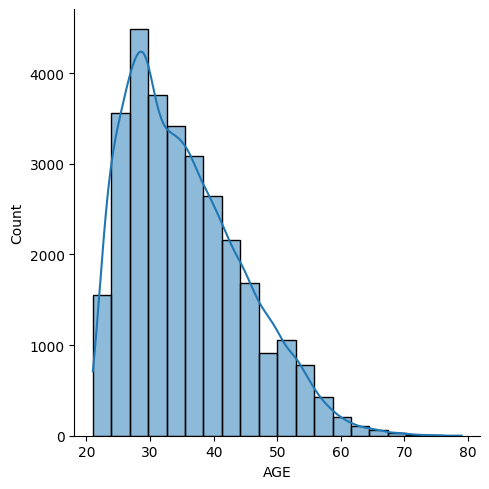

In [11]:
sns.displot(credit['AGE'], bins = 20, kde = True)

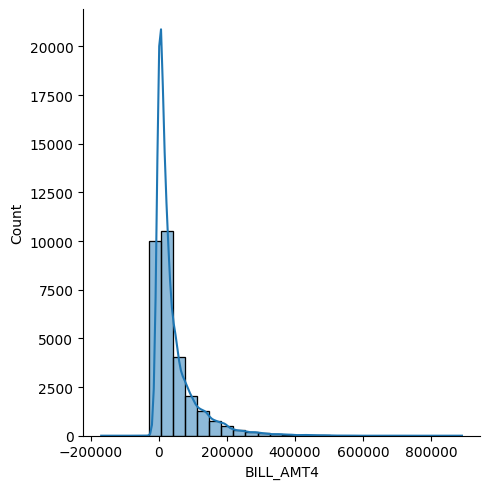

In [12]:
sns.displot(credit['BILL_AMT4'], bins = 30, kde = True)

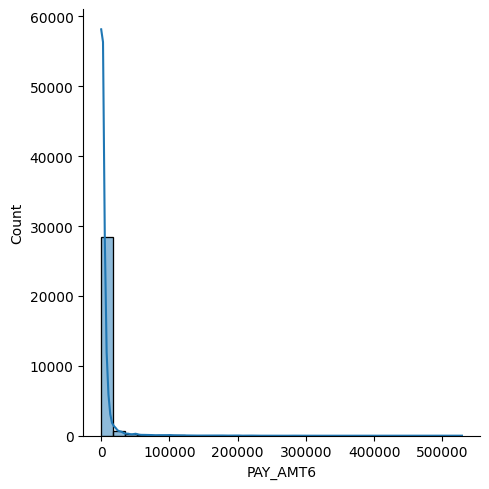

In [28]:
sns.displot(credit['PAY_AMT6'], bins = 30, kde = True)

<AxesSubplot: >

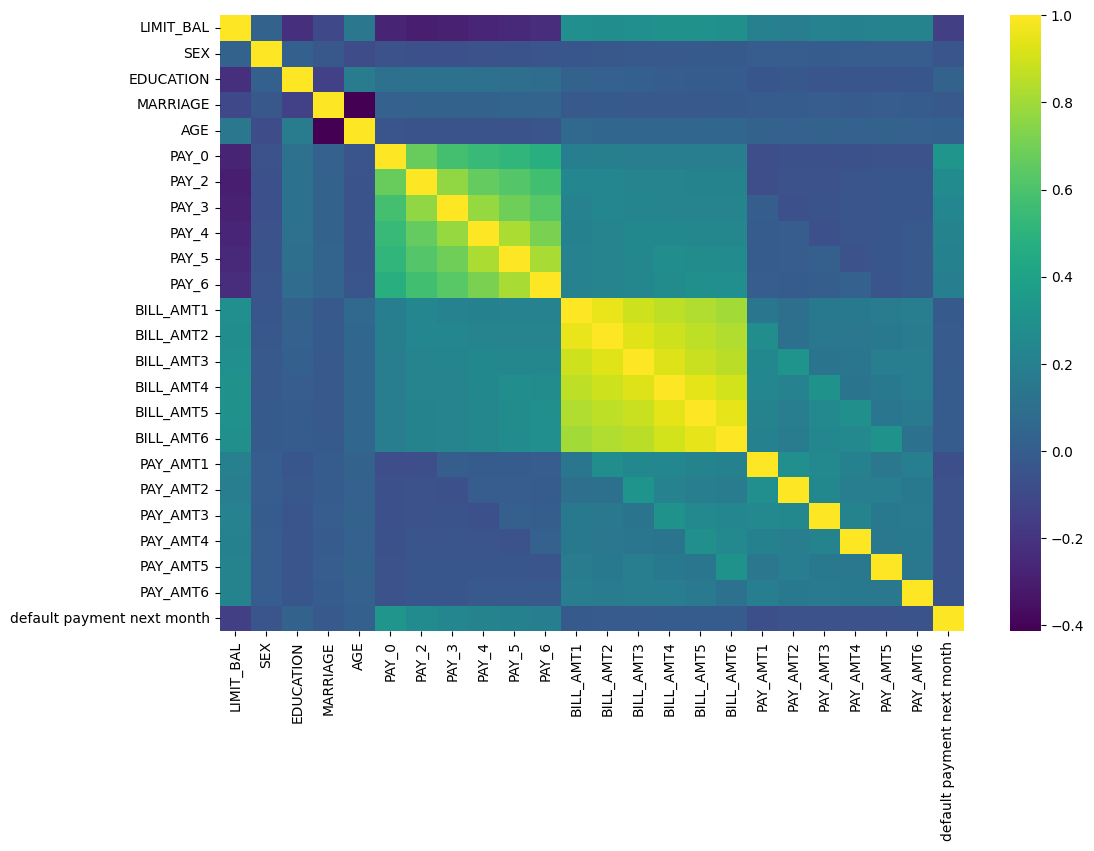

In [13]:
plt.figure(figsize = (12,8))
sns.heatmap(credit.corr(), cmap = 'viridis')

<AxesSubplot: xlabel='SEX', ylabel='count'>

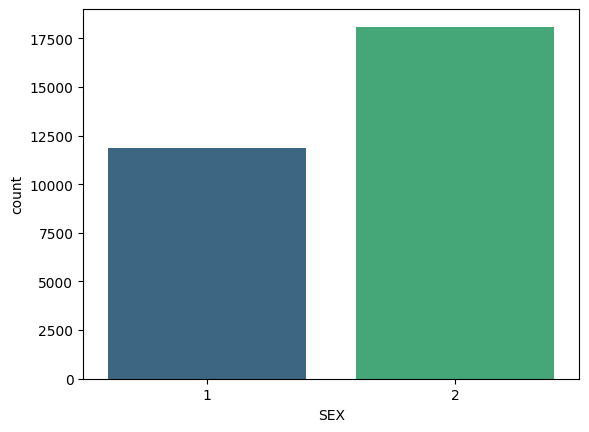

In [14]:
sns.countplot(x = 'SEX', data= credit, palette = 'viridis')

In [15]:
credit['SEX'].value_counts()

2    18091
1    11874
Name: SEX, dtype: int64

<AxesSubplot: xlabel='SEX', ylabel='count'>

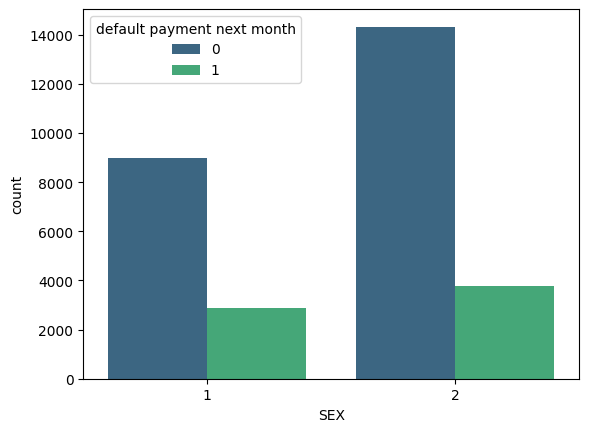

In [17]:
sns.countplot(x = 'SEX', data = credit, palette = 'viridis', hue = 'default payment next month')

In [18]:
credit['EDUCATION'].value_counts()

2    14019
1    10563
3     4915
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

<AxesSubplot: xlabel='EDUCATION', ylabel='count'>

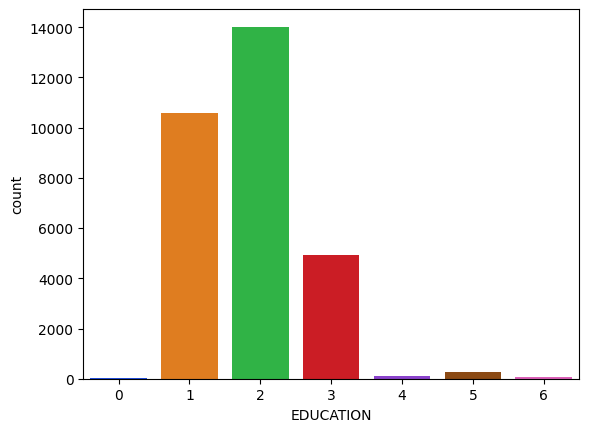

In [19]:
sns.countplot(x ='EDUCATION', data = credit, palette = 'bright')

<AxesSubplot: xlabel='EDUCATION', ylabel='count'>

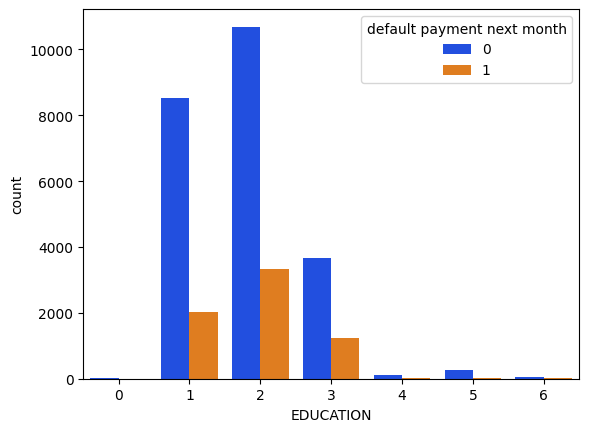

In [20]:
sns.countplot(x = 'EDUCATION', data = credit, palette = 'bright', hue = 'default payment next month')

In [21]:
credit['MARRIAGE'].value_counts()

2    15945
1    13643
3      323
0       54
Name: MARRIAGE, dtype: int64

<AxesSubplot: xlabel='MARRIAGE', ylabel='count'>

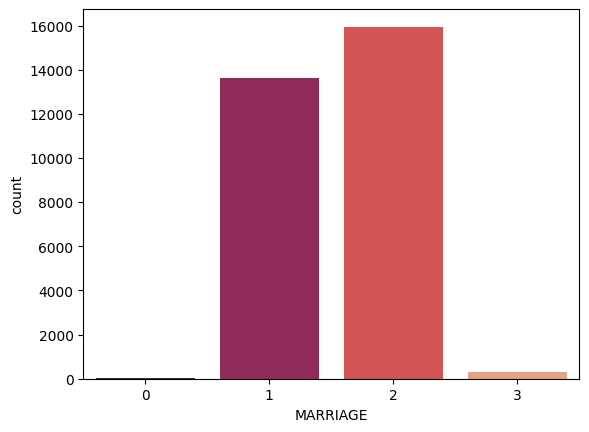

In [22]:
sns.countplot(x = 'MARRIAGE', data = credit, palette = 'rocket')

<AxesSubplot: xlabel='MARRIAGE', ylabel='count'>

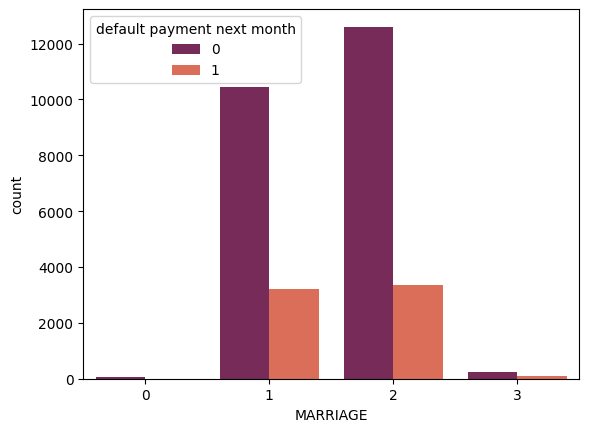

In [23]:
sns.countplot(x = 'MARRIAGE', data = credit, palette = 'rocket', hue = 'default payment next month')

<AxesSubplot: xlabel='LIMIT_BAL'>

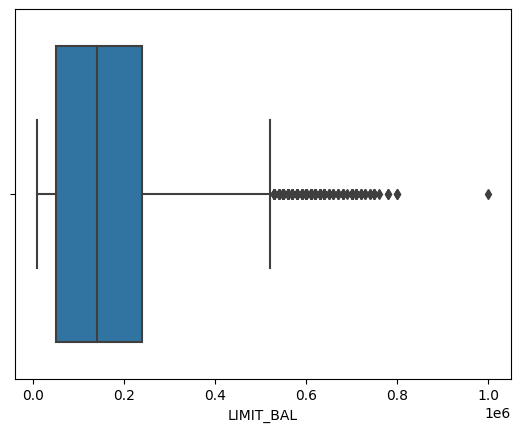

In [24]:
sns.boxplot(x = 'LIMIT_BAL', data = credit)

<AxesSubplot: xlabel='PAY_AMT6'>

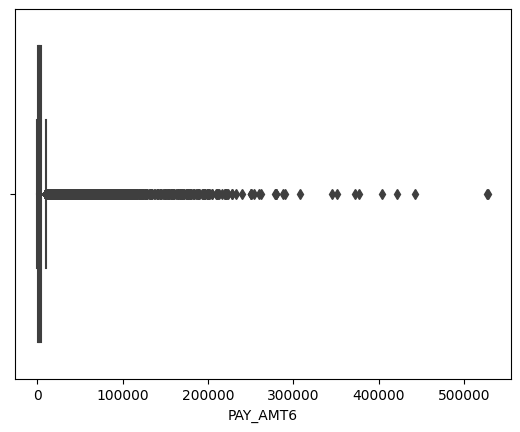

In [25]:
sns.boxplot(x = 'PAY_AMT6', data = credit)

Elimination of the outliers in the figure above

In [6]:
credit = credit[(credit['LIMIT_BAL'] <= 550000) & (credit['PAY_AMT6'] <= 50000)]

In [27]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29327 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   29327 non-null  int64
 1   SEX                         29327 non-null  int64
 2   EDUCATION                   29327 non-null  int64
 3   MARRIAGE                    29327 non-null  int64
 4   AGE                         29327 non-null  int64
 5   PAY_0                       29327 non-null  int64
 6   PAY_2                       29327 non-null  int64
 7   PAY_3                       29327 non-null  int64
 8   PAY_4                       29327 non-null  int64
 9   PAY_5                       29327 non-null  int64
 10  PAY_6                       29327 non-null  int64
 11  BILL_AMT1                   29327 non-null  int64
 12  BILL_AMT2                   29327 non-null  int64
 13  BILL_AMT3                   29327 non-null  int64
 14  BILL_A

<AxesSubplot: xlabel='LIMIT_BAL'>

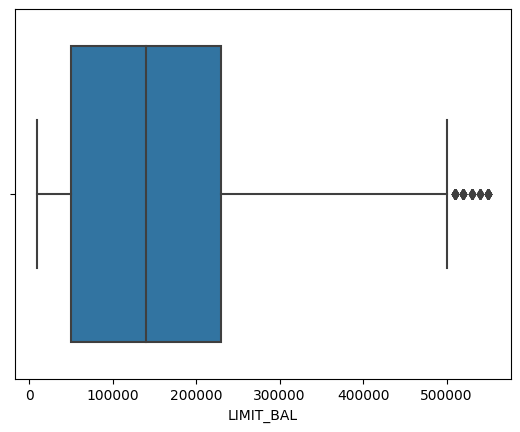

In [7]:
sns.boxplot(x = 'LIMIT_BAL', data = credit)

<AxesSubplot: xlabel='PAY_AMT6'>

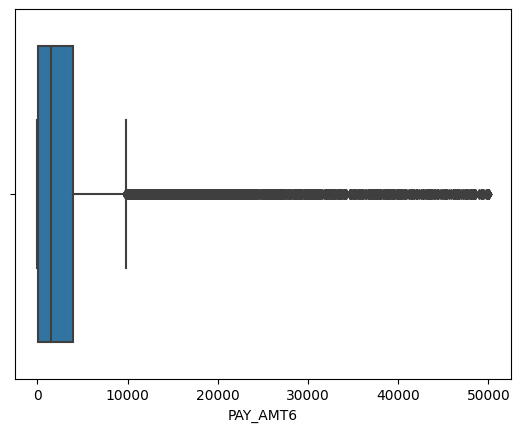

In [29]:
sns.boxplot(x = 'PAY_AMT6', data = credit)

In [8]:
scaler = StandardScaler()
scaler.fit(credit.drop('default payment next month', axis = 1))

StandardScaler()

In [13]:
scaled_data = scaler.transform(credit.drop('default payment next month', axis = 1))

In [14]:
credit_feat = pd.DataFrame(scaled_data, columns = credit.columns[:-1])
credit_feat.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.732984,-1.146378,0.808940,0.182305,-1.056795,-1.241270,1.788771,1.773656,-0.699807,-0.668688,...,-0.674054,-0.680242,-0.671047,-0.663140,-0.364489,-0.231546,-0.325252,-0.318125,-0.315033,-0.570231
1,-1.732868,-0.346094,0.808940,0.182305,0.857668,-1.024592,-0.881562,1.773656,0.133299,0.183409,...,-0.644340,-0.627583,-0.612305,-0.606703,-0.364489,-0.216751,-0.258688,-0.248441,-0.315033,-0.223923
2,-1.732753,-0.586179,0.808940,0.182305,0.857668,-0.157878,0.008549,0.106570,0.133299,0.183409,...,-0.482174,-0.449602,-0.416901,-0.394039,-0.260592,-0.192965,-0.258688,-0.248441,-0.245368,0.295538
3,-1.732637,-0.906293,0.808940,0.182305,-1.056795,0.167139,0.008549,0.106570,0.133299,0.183409,...,0.050559,-0.224564,-0.178685,-0.151781,-0.227602,-0.168276,-0.245375,-0.241473,-0.240561,-0.397077
4,-1.732522,-0.906293,-1.236186,0.182305,-1.056795,2.333923,-0.881562,0.106570,-0.699807,0.183409,...,-0.150058,-0.343239,-0.345526,-0.332047,-0.227602,1.480638,0.340382,0.309034,-0.267034,-0.452660


In [ ]:
import findspark
findspark.init()
import pyspark
import random
from pyspark.context import SparkContext

conf = (pyspark.SparkConf().setAppName("simple")
        .set("spark.shuffle.service.enabled", "false")
        .set("spark.dynamicAllocation.enabled", "false")
        .set("spark.io.compression.codec", "snappy")
        .set("spark.cores.max", "1")
        .set("spark.rdd.compress", "true")
        .set("spark.executor.instances","2")
        .set("spark.executor.memory","512m")
        .set("spark.executor.cores","1"))

sc = pyspark.SparkContext(conf = conf)

In [15]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[1]").appName("SparkByExamples.com").getOrCreate()
#sparkDF=spark.createDataFrame(credit_feat) 
#sparkDF.printSchema()
sparkDF.show()

/usr/local/spark-3.3.1-bin-hadoop3/python/pyspark/sql/pandas/conversion.py:474: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():
/usr/local/spark-3.3.1-bin-hadoop3/python/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


root
 |-- ID: double (nullable = true)
 |-- LIMIT_BAL: double (nullable = true)
 |-- SEX: double (nullable = true)
 |-- EDUCATION: double (nullable = true)
 |-- MARRIAGE: double (nullable = true)
 |-- AGE: double (nullable = true)
 |-- PAY_0: double (nullable = true)
 |-- PAY_2: double (nullable = true)
 |-- PAY_3: double (nullable = true)
 |-- PAY_4: double (nullable = true)
 |-- PAY_5: double (nullable = true)
 |-- PAY_6: double (nullable = true)
 |-- BILL_AMT1: double (nullable = true)
 |-- BILL_AMT2: double (nullable = true)
 |-- BILL_AMT3: double (nullable = true)
 |-- BILL_AMT4: double (nullable = true)
 |-- BILL_AMT5: double (nullable = true)
 |-- BILL_AMT6: double (nullable = true)
 |-- PAY_AMT1: double (nullable = true)
 |-- PAY_AMT2: double (nullable = true)
 |-- PAY_AMT3: double (nullable = true)
 |-- PAY_AMT4: double (nullable = true)
 |-- PAY_AMT5: double (nullable = true)
 |-- PAY_AMT6: double (nullable = true)

23/02/02 10:32:31 WARN TaskSetManager: Stage 0 contains a ta

+-------------------+--------------------+-------------------+-------------------+-------------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                 ID|           LIMIT_BAL|                SEX|          EDUCATION|           MARRIAGE|                 AGE|               PAY_0|              PAY_2|              PAY_3|              PAY_4|              PAY_5|              PAY_6|           BILL_AMT1|           BILL_AMT2|           BILL_AMT3|           BILL_AMT4|           BILL_AMT5|           BILL_AMT6|            PAY_AMT1|            PAY_AMT2|            PAY_AMT3|            PAY_AMT4|            PAY_AMT5|            PAY_AMT6|
+-----

23/02/02 10:48:42 WARN NettyRpcEnv: Ignored failure: java.util.concurrent.TimeoutException: Cannot receive any reply from master:37193 in 10000 milliseconds


In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
train, test = sparkDF.randomSplit([0.7, 0.3])
tree = DecisionTreeClassifier()
print(tree.explainParams())
train.printSchema()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, 
                                                    credit['default payment next month'], 
                                                    test_size = 0.30, 
                                                    random_state=42)

In [47]:
from pyspark.ml.classification import LogisticRegression as SparkLogReg
help(SparkLogReg)

Help on class LogisticRegression in module pyspark.ml.classification:

class LogisticRegression(_JavaProbabilisticClassifier, _LogisticRegressionParams, pyspark.ml.util.JavaMLWritable, pyspark.ml.util.JavaMLReadable)
 |  LogisticRegression(*, featuresCol: str = 'features', labelCol: str = 'label', predictionCol: str = 'prediction', maxIter: int = 100, regParam: float = 0.0, elasticNetParam: float = 0.0, tol: float = 1e-06, fitIntercept: bool = True, threshold: float = 0.5, thresholds: Optional[List[float]] = None, probabilityCol: str = 'probability', rawPredictionCol: str = 'rawPrediction', standardization: bool = True, weightCol: Optional[str] = None, aggregationDepth: int = 2, family: str = 'auto', lowerBoundsOnCoefficients: Optional[pyspark.ml.linalg.Matrix] = None, upperBoundsOnCoefficients: Optional[pyspark.ml.linalg.Matrix] = None, lowerBoundsOnIntercepts: Optional[pyspark.ml.linalg.Vector] = None, upperBoundsOnIntercepts: Optional[pyspark.ml.linalg.Vector] = None, maxBlockSizeIn

In [49]:
logmodel = SparkLogReg(predictionCol = "default payment next month")
logmodel.fit(X_train, y_train)

AssertionError: 

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, predictions))

In [ ]:
print(classification_report(y_test, predictions))